In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import cv2
import os
#from skimage.color import rgb2gray
from PIL import Image
import scipy.misc
import matplotlib
import random

In [5]:
# 1
def cropping(img):
    
    #img = rgb2gray(img)

   # Convert image to array
    image_arr = np.array(img) # input  
    
    # Crop image (1)
    image_arr = image_arr[289:-1, 0:2175]
    
    # Crop image (2)
    image_arr = image_arr[0:1228, 70:-1]
    
    return image_arr

In [12]:
# 2
def thresholding(img,):
    
    th_values = np.linspace(0, 0.1, 2)
        
    for j in th_values:
        if j == 0.1:
            for i in range(len(img)):
                for u in range(len(img[i])): 
                    if img[i][u] > j:
                        img[i][u] = 0
                    else:
                        img[i][u] = 1
                            
    
    matplotlib.image.imsave(f'C:/Users/Hp/Desktop/History_of_MI_thr/thr_{img_name}.jpg', img)
    

    return img
    #cv2.imwrite(f'C:/Users/Hp/Desktop/shade/th.jpg',gray_raw_img)

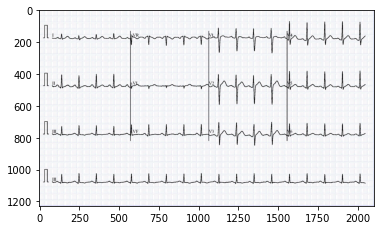

In [13]:
img = cv2.imread("C:/Users/Hp/Desktop/org_Data/abnormal/HB   (26).jpg")

cropped = cropping(img)

thresholding(cropped)

In [51]:
def shading(img,img_name):
    
    shades = [70,30,100]

    for i in shades:

        bright = np.ones(img.shape,dtype="uint8")*i

        bright_dec = cv2.subtract(img,bright)

        #save the three shaded pics in the folder

        cv2.imwrite(f'C:/Users/Hp/Desktop/Data_thr_aug/myocardial_Infarction_thr/shaded_{img_name}_{i}',bright_dec)


In [52]:
def flipping(img,img_name):
    
    flippedimage= cv2.flip(img, 1)
    
    cv2.imwrite(f'C:/Users/Hp/Desktop/Data_thr_aug/myocardial_Infarction_thr/flipped_{img_name}',flippedimage)


In [53]:
def shading_flipping(img,img_name):
    
    flippedimage= cv2.flip(img, 1)
    
    shades = [70,30,130]

    for i in shades:
        
        bright = np.ones(flippedimage.shape,dtype="uint8")*i

        bright_dec = cv2.subtract(flippedimage,bright)

        #save the three shaded pics in the folder

        cv2.imwrite(f'C:/Users/Hp/Desktop/Data_thr_aug/myocardial_Infarction_thr/shaded_flipped_{img_name}_{i}',bright_dec)
    

# Cropping and changing the threshold of the images 

In [ ]:
DATADIR = 'C:/Users/Hp/Desktop/org_Data/'
CATEGORIES = ['abnormal','History_of_MI','myocardial_Infarction','normal']

#for category in CATEGORIES:
path = os.path.join(DATADIR, 'History_of_MI')
for img_name in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img_name), cv2.IMREAD_GRAYSCALE)
    cropped = cropping(img_array)
    thr_pic = thresholding(cropped,img_name)
        


# Augmentation flipping and shading

In [54]:
DATADIR = 'C:/Users/Hp/Desktop/Data_thr_aug/'
CATEGORIES = ['abnormal_thr','History_of_MI_thr','myocardial_Infarction_thr','normal_thr']

#for category in CATEGORIES:
path = os.path.join(DATADIR, 'myocardial_Infarction_thr')
for img_name in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img_name), cv2.IMREAD_GRAYSCALE)
    
    #flipping 
    flipping(img_array,img_name)
    
    #shading (2 pics)
    shading(img_array,img_name)
    
    #shading and flipping(2 pics)
    shading_flipping(img_array,img_name)
        


In [120]:
img = cv2.imread("C:/Users/Hp/Desktop/shade/thr11.jpg")

#img = rgb2gray(img)


cropped = cropping(img)

img = thresholding(cropped)

#img = img.astype("uint8")


#thr_pic = thr_pic.astype('uint8')

#bright = np.ones(img.shape,dtype="uint8")*11

#bright_dec = cv2.subtract(img,bright)

shading(img)

flipping(img)


#save the three shaded pics in the folder

#flipping(thr_pic)


# EDA 

In [26]:
import seaborn as sns

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Without Augmentation')

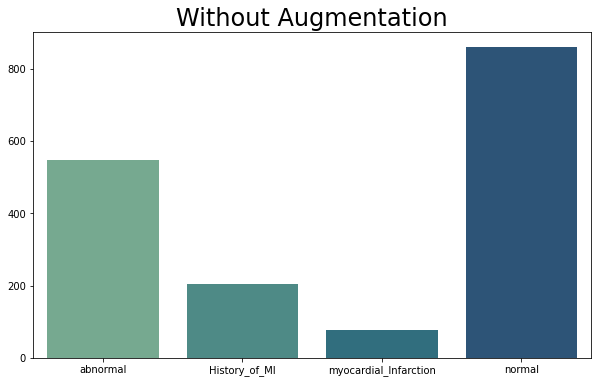

In [34]:
x = ['abnormal','History_of_MI','myocardial_Infarction','normal']
y = [548,203,77,859 ]
plt.figure(figsize=(10,6))
ax = sns.barplot(x,y,palette='crest')
plt.title("Without Augmentation", size=24)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'With Augmentation')

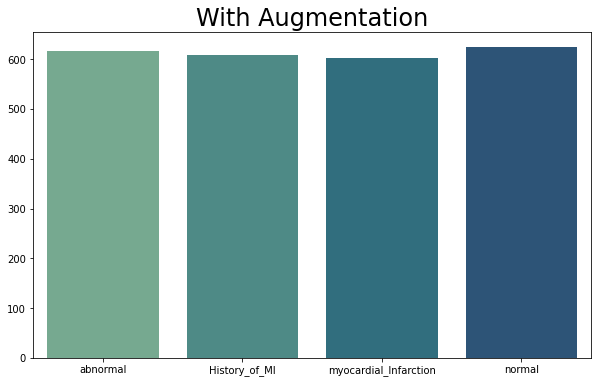

In [33]:
x = ['abnormal','History_of_MI','myocardial_Infarction','normal']
y = [617,609,602,624 ]

plt.figure(figsize=(10,6))

ax = sns.barplot(x,y,palette='crest')



plt.title("With Augmentation", size=24)